In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_sample = 10000
np.random.seed(20190606)
X = np.random.random(num_sample)*100
u = np.random.normal(loc=0, scale= 0.5, size=num_sample)
y = -1.2*np.sin(0.3*X) + 1.5*np.cos(1.7*X) + u

In [3]:
init_param = np.array([-1.5, 0.5, 1.7, 1.8])
z0 = init_param[0]*np.sin(init_param[1]*X) + init_param[2]*np.cos(init_param[3]*X)

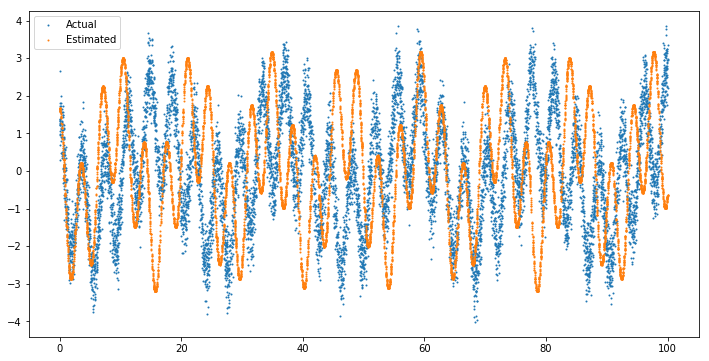

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z0, s=1, label='Estimated')
plt.legend()
plt.show()

### 1. Batch Gradient Descent

In [5]:
learning_rate = 1e-2
param = init_param
for i in range(10001):
    z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
    loss = np.mean((z-y)**2)
    
    grad = np.array([
        np.mean(2*(z-y)*np.sin(param[1]*X)),
        np.mean(2*(z-y)*param[0]*param[1]*np.cos(param[1]*X)),
        np.mean(2*(z-y)*np.cos(param[3]*X)),
        np.mean(2*(z-y)*param[2]*param[3]*(-np.sin(param[3]*X)))
    ])
    
    param = param - learning_rate * grad
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 4.76418, Updated Parameter: [-1.48597379  0.4997779   1.68179786  1.79141581]
i:  1000, Loss: 0.98616, Updated Parameter: [-0.07832258  0.49807939  1.52038881  1.70007859]
i:  2000, Loss: 0.98616, Updated Parameter: [-0.07820017  0.49807115  1.52039911  1.70007861]
i:  3000, Loss: 0.98616, Updated Parameter: [-0.07819637  0.49807056  1.52039913  1.70007861]
i:  4000, Loss: 0.98616, Updated Parameter: [-0.0781961   0.49807052  1.52039914  1.70007861]
i:  5000, Loss: 0.98616, Updated Parameter: [-0.07819608  0.49807052  1.52039914  1.70007861]
i:  6000, Loss: 0.98616, Updated Parameter: [-0.07819608  0.49807051  1.52039914  1.70007861]
i:  7000, Loss: 0.98616, Updated Parameter: [-0.07819608  0.49807051  1.52039914  1.70007861]
i:  8000, Loss: 0.98616, Updated Parameter: [-0.07819608  0.49807051  1.52039914  1.70007861]
i:  9000, Loss: 0.98616, Updated Parameter: [-0.07819608  0.49807051  1.52039914  1.70007861]
i: 10000, Loss: 0.98616, Updated Parameter: [-0.07819608  0.

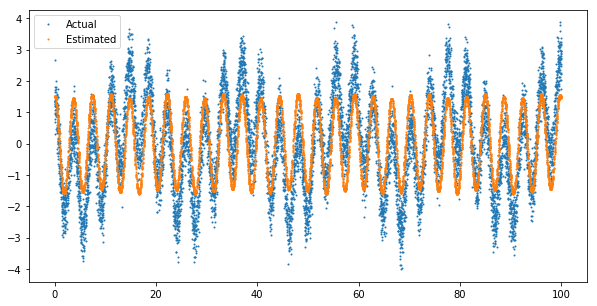

In [6]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 2. Stochastic Gradient Descent

In [7]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
param = init_param
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])

        param = param - learning_rate * grad
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 4.16300, Updated Parameter: [-1.36512461  0.49882419  1.54115021  1.75972438]
i:  1000, Loss: 1.04145, Updated Parameter: [-0.07879384  0.4980666   1.50234222  1.70113537]
i:  2000, Loss: 0.95435, Updated Parameter: [-0.07783271  0.49807257  1.5077624   1.69836188]
i:  3000, Loss: 1.00358, Updated Parameter: [-0.07789016  0.49800719  1.4985891   1.70197388]
i:  4000, Loss: 1.13592, Updated Parameter: [-0.07827074  0.49802737  1.50383726  1.69223886]
i:  5000, Loss: 0.96335, Updated Parameter: [-0.07918015  0.49806139  1.49769231  1.69951521]
i:  6000, Loss: 1.04784, Updated Parameter: [-0.07827672  0.49804072  1.50658456  1.69919592]
i:  7000, Loss: 1.00201, Updated Parameter: [-0.07844379  0.49807486  1.50770684  1.69613459]
i:  8000, Loss: 0.91121, Updated Parameter: [-0.07860027  0.49806372  1.50294832  1.69880819]
i:  9000, Loss: 1.14584, Updated Parameter: [-0.07843379  0.49807791  1.49968618  1.70479174]
i: 10000, Loss: 1.04169, Updated Parameter: [-0.07767753  0.

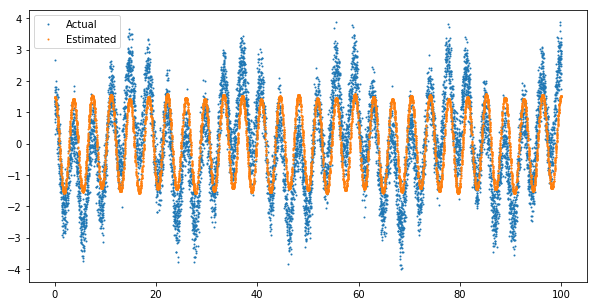

In [8]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 3. Momentum

In [9]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
gamma = 0.9
param = init_param
v = np.zeros(4)
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        v = gamma*v + learning_rate * grad
        param = param - v
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 3.54716, Updated Parameter: [-0.96834436  0.49288363  1.09621383  1.57071213]
i:  1000, Loss: 2.11416, Updated Parameter: [-0.08860624  0.49876467 -0.0084722   1.57566363]
i:  2000, Loss: 2.19439, Updated Parameter: [-8.37684150e-02  4.98512532e-01  8.43507453e-05  1.57536785e+00]
i:  3000, Loss: 2.13171, Updated Parameter: [-0.08779997  0.49876935  0.00396186  1.57534499]
i:  4000, Loss: 2.28852, Updated Parameter: [-0.09416616  0.49884002  0.00304882  1.57559887]
i:  5000, Loss: 2.21874, Updated Parameter: [-0.09154207  0.49874301 -0.00445154  1.57555444]
i:  6000, Loss: 2.05681, Updated Parameter: [-0.08623465  0.4982835   0.0047998   1.57542182]
i:  7000, Loss: 2.21273, Updated Parameter: [-0.08453176  0.49883724 -0.00872111  1.57611761]
i:  8000, Loss: 2.06702, Updated Parameter: [-0.08588171  0.49857378  0.00603903  1.57542673]
i:  9000, Loss: 2.10367, Updated Parameter: [-8.64551517e-02  4.98430682e-01 -2.06606117e-04  1.57535367e+00]
i: 10000, Loss: 2.21588, Upd

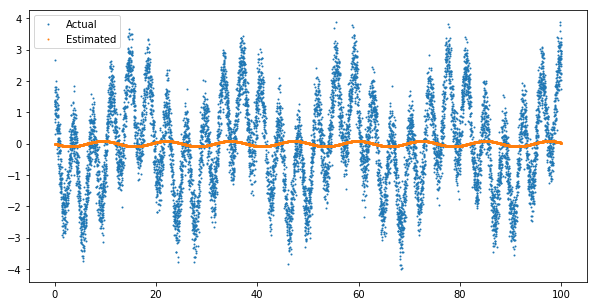

In [10]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 4. Nesterov Accelerated Gradient(NAG)

In [11]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
gamma = 0.9
param = init_param
v = np.zeros(4)
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)
        
        z_sample_2 = (param[0]-gamma*v[0])*np.sin((param[1]-gamma*v[1])*X_sample) + (param[2]-gamma*v[2])*np.cos((param[3]-gamma*v[3])*X_sample)
        grad = np.array([
            np.mean(2*(z_sample_2-y_sample)*np.sin((param[1]-gamma*v[1])*X_sample)),
            np.mean(2*(z_sample_2-y_sample)*(param[0]-gamma*v[0])*(param[1]-gamma*v[1])*np.cos((param[1]-gamma*v[1])*X_sample)),
            np.mean(2*(z_sample_2-y_sample)*np.cos((param[3]-gamma*v[3])*X_sample)),
            np.mean(2*(z_sample_2-y_sample)*(param[2]-gamma*v[2])*(param[3]-gamma*v[3])*(-np.sin((param[3]-gamma*v[3])*X_sample)))
        ])
        
        v = gamma*v + learning_rate * grad
        param = param - v
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 1.47584, Updated Parameter: [-0.97934134  0.49755053  1.22917302  1.69362386]
i:  1000, Loss: 1.03596, Updated Parameter: [-0.07465438  0.49804944  1.19946095  1.70397927]
i:  2000, Loss: 1.03025, Updated Parameter: [-0.07803296  0.49793302  1.15158881  1.69892348]
i:  3000, Loss: 1.07372, Updated Parameter: [-0.08080227  0.49816415  1.17406701  1.69612008]
i:  4000, Loss: 1.04375, Updated Parameter: [-0.0791665   0.49773628  1.20031402  1.69600361]
i:  5000, Loss: 1.05685, Updated Parameter: [-0.08686003  0.49793582  1.17648809  1.69612473]
i:  6000, Loss: 1.09194, Updated Parameter: [-0.08743021  0.49825041  1.19851602  1.6941662 ]
i:  7000, Loss: 1.08768, Updated Parameter: [-0.08661599  0.49885448  1.20060128  1.69512379]
i:  8000, Loss: 1.08036, Updated Parameter: [-0.08869631  0.49766587  1.20115675  1.69451633]
i:  9000, Loss: 1.13891, Updated Parameter: [-0.08496614  0.49809841  1.20646279  1.69515689]
i: 10000, Loss: 1.09054, Updated Parameter: [-0.08486007  0.

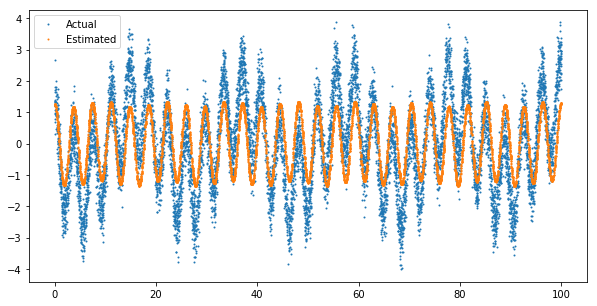

In [12]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 5. Adagrad

In [13]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
param = init_param
G = np.zeros(4)
eps = 1e-4
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        G = G + grad**2
        param = param - learning_rate/np.sqrt(G+eps)*grad
        
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 3.81880, Updated Parameter: [-1.45051607  0.49500262  1.65096957  1.76566444]
i:  1000, Loss: 1.06887, Updated Parameter: [-0.20530973  0.49809126  1.51954532  1.70009162]
i:  2000, Loss: 0.97051, Updated Parameter: [-0.0967352   0.49807228  1.52022223  1.7000803 ]
i:  3000, Loss: 0.96849, Updated Parameter: [-0.08092271  0.4980719   1.52033011  1.70009909]
i:  4000, Loss: 0.94110, Updated Parameter: [-0.07859403  0.49807149  1.52035328  1.70007767]
i:  5000, Loss: 0.98141, Updated Parameter: [-0.07824842  0.49807108  1.52035346  1.70006101]
i:  6000, Loss: 0.90235, Updated Parameter: [-0.07819829  0.49807113  1.5203626   1.70008022]
i:  7000, Loss: 0.99846, Updated Parameter: [-0.0781888   0.49806898  1.52036225  1.70008311]
i:  8000, Loss: 0.99460, Updated Parameter: [-0.0781848   0.49807007  1.52036412  1.70006177]
i:  9000, Loss: 0.99510, Updated Parameter: [-0.07818815  0.49806969  1.52036669  1.70009013]
i: 10000, Loss: 0.97942, Updated Parameter: [-0.07818879  0.

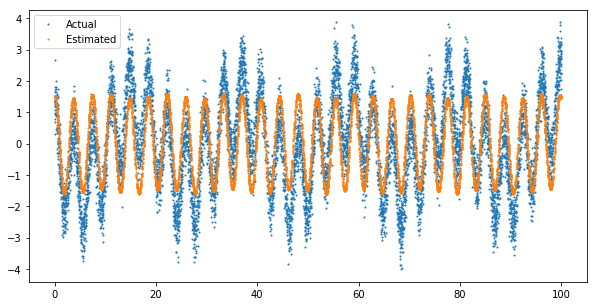

In [14]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 6. RMSProp

In [15]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
learning_rate = 1e-2
param = init_param
G = np.zeros(4)
eps = 1e-4
gamma = 0.5
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        G = gamma*G + (1-gamma)*grad**2
        param = param - learning_rate/np.sqrt(G+eps)*grad
        
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 4.56516, Updated Parameter: [-1.39466357  0.4818103   1.59378079  1.74422532]
i:  1000, Loss: 1.03194, Updated Parameter: [-0.06861885  0.49588394  1.46436339  1.69473527]
i:  2000, Loss: 1.17277, Updated Parameter: [-0.09008607  0.50022735  1.45961714  1.69405746]
i:  3000, Loss: 1.09128, Updated Parameter: [-0.07685787  0.49775856  1.46644032  1.70697713]
i:  4000, Loss: 1.07048, Updated Parameter: [-0.08357504  0.4957018   1.45740794  1.70417601]
i:  5000, Loss: 1.13352, Updated Parameter: [-0.08360423  0.49530722  1.43547299  1.69547214]
i:  6000, Loss: 0.98701, Updated Parameter: [-0.09413027  0.49893799  1.46009439  1.70407717]
i:  7000, Loss: 1.12056, Updated Parameter: [-0.081349    0.49370917  1.46192543  1.70545158]
i:  8000, Loss: 1.11047, Updated Parameter: [-0.0760642   0.49914796  1.45916623  1.69466288]
i:  9000, Loss: 1.09358, Updated Parameter: [-0.0647747   0.49926895  1.44727463  1.70536607]
i: 10000, Loss: 1.11692, Updated Parameter: [-0.07094882  0.

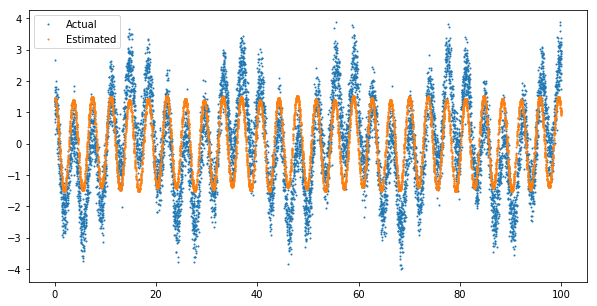

In [16]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 7. AdaDelta

In [17]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
param = init_param
G = np.zeros(4)
eps = 1e-4
gamma = 0.5
s = np.zeros(4)
delta = np.zeros(4)
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        G = gamma*G + (1-gamma)*grad**2
        delta = np.sqrt(s+eps)/np.sqrt(G+eps)*grad
        param = param - delta
        s = gamma*s + (1-gamma)*delta**2
        
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 4.54961, Updated Parameter: [-1.30073254  0.49251988  1.50135424  1.73003636]
i:  1000, Loss: 2.40137, Updated Parameter: [-0.10951348  0.49598343  0.47590934  1.71323469]
i:  2000, Loss: 1.86111, Updated Parameter: [-0.10876313  0.49413708  0.44056412  1.66556393]
i:  3000, Loss: 1.70985, Updated Parameter: [-0.0803648   0.4992023   0.46872202  1.66527192]
i:  4000, Loss: 2.35267, Updated Parameter: [-0.0634249   0.49968597  0.40671634  1.69438107]
i:  5000, Loss: 2.04334, Updated Parameter: [-0.08695763  0.50069562  0.48657252  1.676475  ]
i:  6000, Loss: 1.80742, Updated Parameter: [-0.08593885  0.49731769  0.43711816  1.66739221]
i:  7000, Loss: 1.94918, Updated Parameter: [-0.09823499  0.50017869  0.4862284   1.67129481]
i:  8000, Loss: 1.94971, Updated Parameter: [-0.07154418  0.49996329  0.49777849  1.72623281]
i:  9000, Loss: 2.24270, Updated Parameter: [-0.05568119  0.49932841  0.43425108  1.71299931]
i: 10000, Loss: 1.95152, Updated Parameter: [-0.09977194  0.

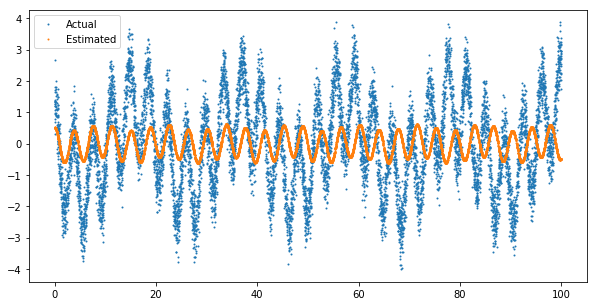

In [18]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()

### 8. Adam

In [19]:
batch_size = 1000
num_batch = np.ceil(X.shape[0]/batch_size).astype(int)
param = init_param
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
m = np.zeros(4)
v = np.zeros(4)
learning_rate = 0.1
for i in range(10001):
    indices_batch = []
    indices_all = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
    for _ in range(num_batch):
        indices_batch.append(indices_all[:batch_size])
        indices_all = indices_all[batch_size:]
        
    for indices in indices_batch:
        X_sample = X[indices]
        y_sample = y[indices]
        z_sample = param[0]*np.sin(param[1]*X_sample) + param[2]*np.cos(param[3]*X_sample)
        loss = np.mean((z_sample-y_sample)**2)

        grad = np.array([
            np.mean(2*(z_sample-y_sample)*np.sin(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[0]*param[1]*np.cos(param[1]*X_sample)),
            np.mean(2*(z_sample-y_sample)*np.cos(param[3]*X_sample)),
            np.mean(2*(z_sample-y_sample)*param[2]*param[3]*(-np.sin(param[3]*X_sample)))
        ])
        
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*grad**2
        m_hat = m/(1-beta1)
        v_hat = v/(1-beta2)
        
        param = param - learning_rate*m_hat/np.sqrt(v_hat+eps)
        
    if(i%1000 == 0):
        print("i: {:5d}, Loss: {:5.5f}, Updated Parameter: {}".format(i, loss, param))

i:     0, Loss: 2.19209, Updated Parameter: [-0.164054    0.40160752  0.25583882  1.43046995]
i:  1000, Loss: 2.11027, Updated Parameter: [1.53778995e-01 4.34770982e-08 2.06732197e-02 8.88902123e-01]
i:  2000, Loss: 2.16224, Updated Parameter: [1.53780437e-001 8.22261059e-143 5.97453934e-002 2.15782444e+000]
i:  3000, Loss: 2.17195, Updated Parameter: [ 3.93279624e-02  1.35455860e-77 -1.47689602e-02  2.24265413e+00]
i:  4000, Loss: 2.03199, Updated Parameter: [ 0.00634979 -1.10295091  0.04143861  2.27602007]
i:  5000, Loss: 2.07842, Updated Parameter: [-0.08544911 -2.01374397 -0.04282358  3.50372504]
i:  6000, Loss: 2.18165, Updated Parameter: [-0.00191174 -0.46498001  0.01693158  0.8730541 ]
i:  7000, Loss: 2.22335, Updated Parameter: [ 2.91794267e-002 -4.37390825e-100  2.95023218e-001  4.21421109e-001]
i:  8000, Loss: 1.48738, Updated Parameter: [-1.18567398  0.29883523 -0.04952042  2.0620631 ]
i:  9000, Loss: 1.34105, Updated Parameter: [-1.2384857   0.30159951 -0.02222234  4.974119

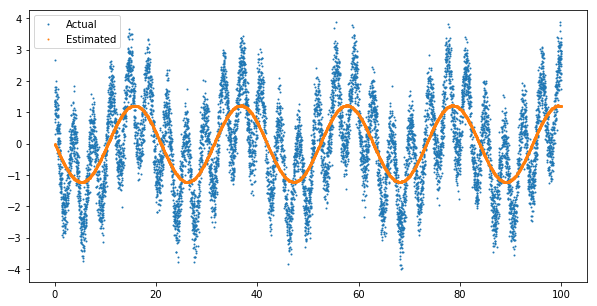

In [20]:
z = param[0]*np.sin(param[1]*X) + param[2]*np.cos(param[3]*X)
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=1, label='Actual')
plt.scatter(X, z, s=1, label='Estimated')
plt.legend()
plt.show()